# Homework 8
## Question 1
Consider a tank with volume 300L containing a salt solution. Suppose a solution with 3.5kg/L of salt flows into the tank at a rate of 12L/min. The solution in the tank is well-mixed. Solution flows out of the tank at a rate of 15L/min. If initially there is 20kg of salt in the tank.

Plot two graphs showing the amount of salt in the tank and the concentration of the salt at any time t

In [1]:
import matplotlib.pyplot as plt
import numpy as np

dt = float(input('timestep in minutes?: ')) # timestep

starting_salt = 20
starting_volume = 300
volume_add_per_min = 12
volume_sub_per_min = 15
salt_add_per_min = 3.5 * volume_add_per_min

salt   = [starting_salt]
volume = [starting_volume]
concentration = [starting_salt/starting_volume]

while True:
    new_salt   = salt[-1] + salt_add_per_min * dt       # salt flows in from liquid
    new_volume = volume[-1] + volume_add_per_min * dt   # liquid volume flows in
    
    # the amount of salt that flowing out is equal to the current concentration times
    # the amount of volume flowing out
    new_salt -= volume_sub_per_min * dt * (concentration[-1])
    new_volume -= volume_sub_per_min * dt # volume is decreased
    
    # stop when volume is zero
    if new_volume <= 0:
        break
    
    #update
    salt.append(new_salt)
    volume.append(new_volume)
    concentration.append(new_salt/new_volume)

print('done!')

timestep in minutes?:  0.00001


done!


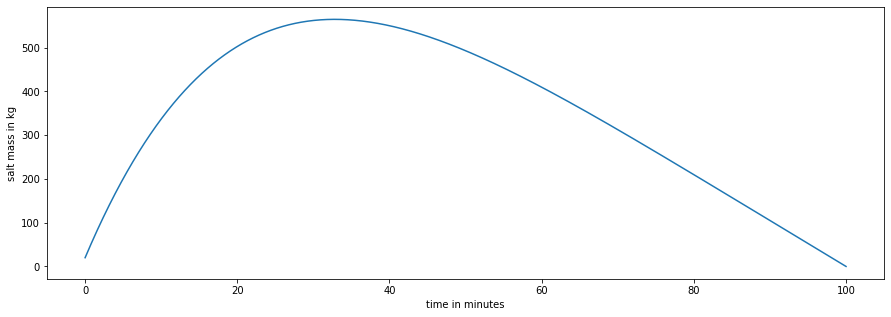

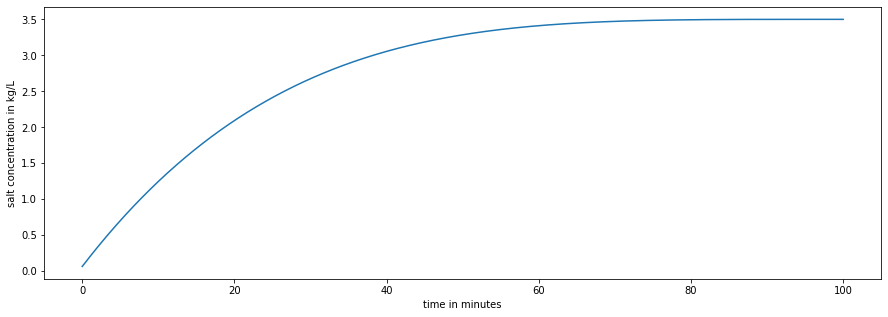

In [2]:
plt.figure(figsize=[15,5])
plt.plot(np.arange(0,len(salt))*dt,salt)
plt.xlabel('time in minutes')
plt.ylabel('salt mass in kg')
plt.show()

plt.figure(figsize=[15,5])
plt.plot(np.arange(0,len(concentration))*dt,concentration)
plt.xlabel('time in minutes')
plt.ylabel('salt concentration in kg/L')
plt.show()

## Questions 2 and 3
How about I do you one better and allow for solutions of any specified differential equation?!

Typing in all of the parameters is kind of tedious, though...

It would be nice to have a dynamic graph, in which you could just click a point, and then evaluate from there. However, that's beyond the scope of this assignment, and I would have to find the right libraries.

input dx in terms of x and y:  (1-x-y)*x
input dy in terms of x and y:  (3/4)*(1-(4/3)*y-(2/3)*x)*y
timestep?:  0.1
amount of steps?:  100
evaluate x between a,b:  0.1,1
evaluate y between c,d:  0.1,1


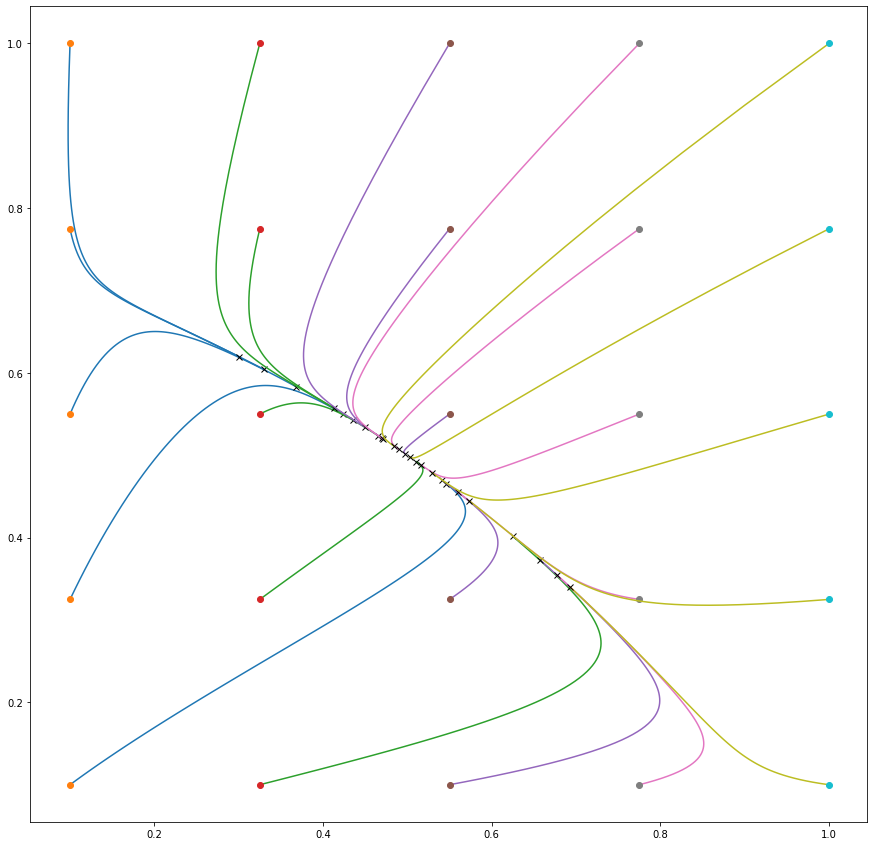

again? (y/n) y
input dx in terms of x and y:  2*x*(1-(x/2))-x*y
input dy in terms of x and y:  y*((9/4)-y**2)-(x**2)*y
timestep?:  0.001
amount of steps?:  10000
evaluate x between a,b:  0.1,3
evaluate y between c,d:  0.1,2


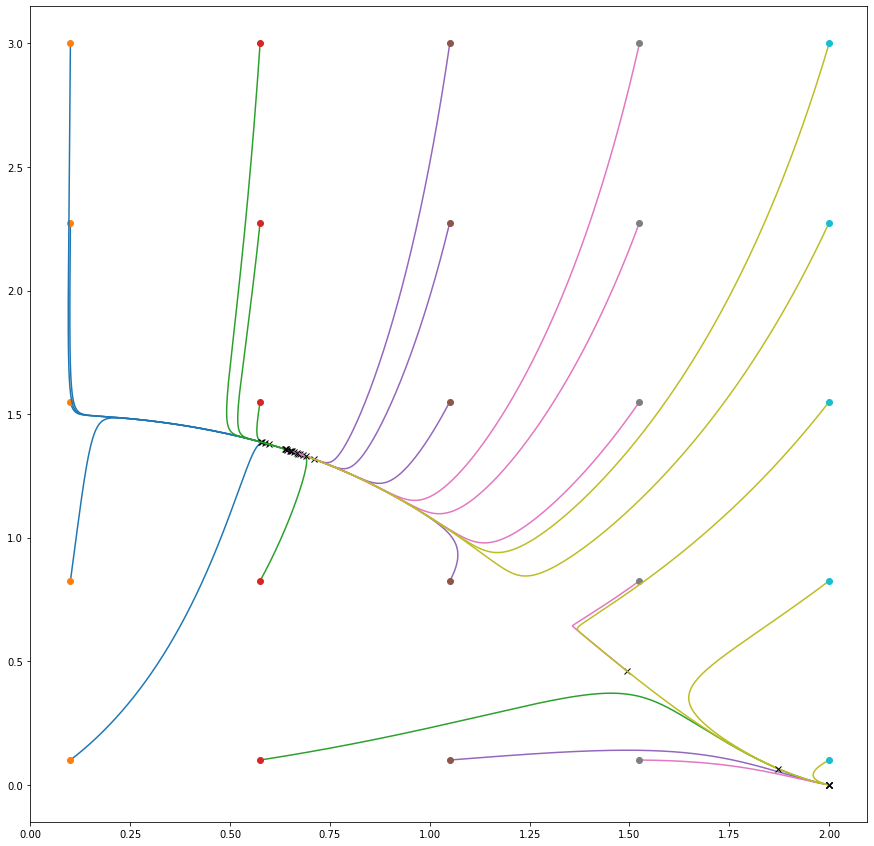

again? (y/n) n


In [2]:
'''
For the equations specified in the assignment, simply copy/paste the following:
(1-x-y)*x
(3/4)*(1-(4/3)*y-(2/3)*x)*y
2*x*(1-(x/2))-x*y
y*((9/4)-y**2)-(x**2)*y
'''

import matplotlib.pyplot as plt
import numpy as np

def solve_graph_ODE(x0,y0,dx,dy,dt,steps):
    x = np.zeros(steps)
    y = np.zeros(steps)
    x[0],y[0] = x0,y0

    t = np.linspace(0,steps*dt,len(x))

    for count in range(steps-1):
        x[count+1]=x[count]+dx(x[count],y[count])*dt
        y[count+1]=y[count]+dy(x[count],y[count])*dt
    
    plt.plot(x,y)
    plt.plot(x[0],y[0],'o')
    plt.plot(x[-1],y[-1],'x',c='black')

while True:
    dxTxt = input('input dx in terms of x and y: ') # get dx/dt
    dyTxt = input('input dy in terms of x and y: ') # get dy/dt
    dt    = float(input('timestep?: '))             # timestep
    steps = int(input('amount of steps?: '))        # number of steps
    a,b   = eval(input('evaluate x between a,b: ')) # range for evaluating x
    c,d   = eval(input('evaluate y between c,d: ')) # range for evaluating y
    
    # make functions from text input
    dx = lambda x,y: eval(dxTxt)
    dy = lambda x,y: eval(dyTxt)
    
    # graph several solutions
    plt.figure(figsize=[15,15])
    for y0 in np.linspace(a,b,5):
        for x0 in np.linspace(c,d,5):
            solve_graph_ODE(x0,y0,dx,dy,dt,steps)
    plt.show()
    
    if input('again? (y/n)') != 'y':
        break